In [1]:
# !pip install umap
# !pip install umap-learn

In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap
import umap.umap_ as umap
import pandas as pd

In [3]:
# Đọc ảnh và gán nhãn
def load_images_from_folder(folder):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        label_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                img_path = os.path.join(label_path, image_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize((64, 64))  # Resize để giảm độ phức tạp
                    img_array = np.array(img).flatten()  # Chuyển ảnh thành vector
                    images.append(img_array)
                    labels.append(label_folder)
                except:
                    print(f"Error loading image: {img_path}")
    return np.array(images), np.array(labels)

data_dir = '/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase3_140924/data/processed/1726417351_70_15_15_42'
# Load dữ liệu từ các thư mục train/valid/test
train_images, train_labels = load_images_from_folder(data_dir + '/train')
valid_images, valid_labels = load_images_from_folder(data_dir + '/valid')
test_images, test_labels = load_images_from_folder(data_dir + '/test')

# Gộp tất cả các tập lại để giảm chiều
all_images = np.concatenate((train_images, valid_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, valid_labels, test_labels), axis=0)

In [4]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_images)

In [5]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(all_images)

In [6]:
# LDA (phải có nhãn để thực hiện)
lda = LDA(n_components=2)
lda_result = lda.fit_transform(all_images, all_labels)

In [7]:
# UMAP
# import umap.umap_ as umap
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(all_images)

In [8]:
# Tạo DataFrame chứa kết quả
result_df = pd.DataFrame({
    'label': all_labels,
    'pca_x': pca_result[:, 0],
    'pca_y': pca_result[:, 1],
    'tsne_x': tsne_result[:, 0],
    'tsne_y': tsne_result[:, 1],
    'lda_x': lda_result[:, 0],
    'lda_y': lda_result[:, 1],
    'umap_x': umap_result[:, 0],
    'umap_y': umap_result[:, 1]
})

# Lưu lại dưới dạng csv
result_df.to_csv('reduced_dimension_results.csv', index=False)

In [9]:
# Thông tin về số lượng ảnh mỗi nhãn trong từng tập
def dataset_statistics(labels, set_name):
    unique, counts = np.unique(labels, return_counts=True)
    return pd.DataFrame({'label': unique, 'count': counts, 'set': set_name})

train_stats = dataset_statistics(train_labels, 'train')
valid_stats = dataset_statistics(valid_labels, 'valid')
test_stats = dataset_statistics(test_labels, 'test')

# Gộp thông tin lại
dataset_info = pd.concat([train_stats, valid_stats, test_stats])
dataset_info.to_csv('dataset_info.csv', index=False)

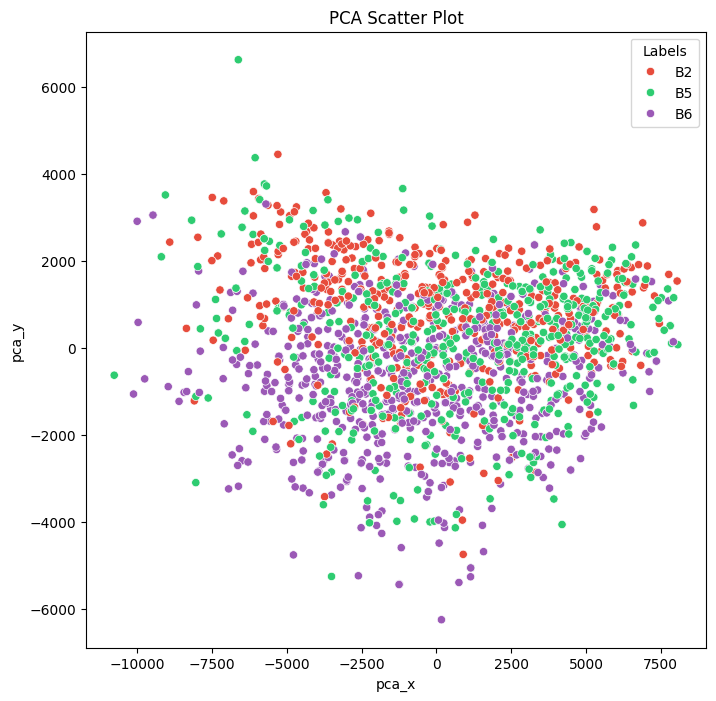

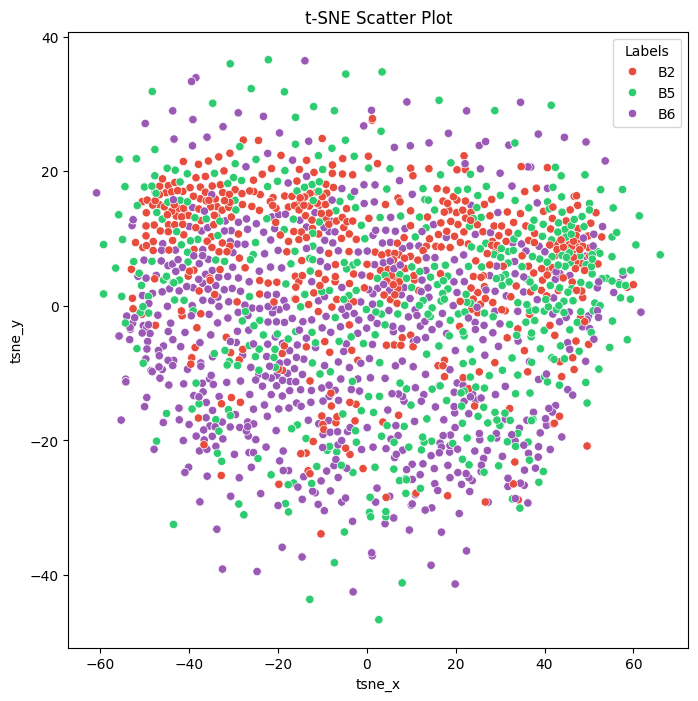

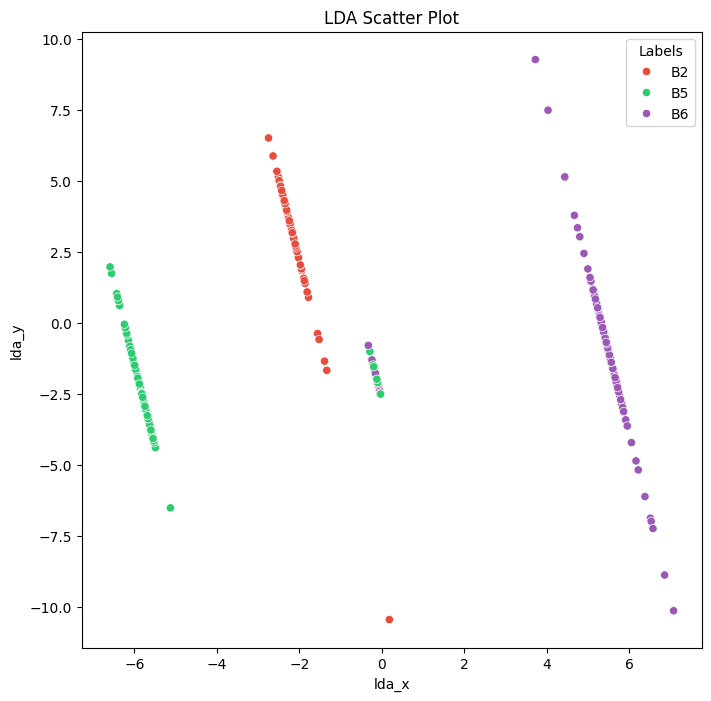

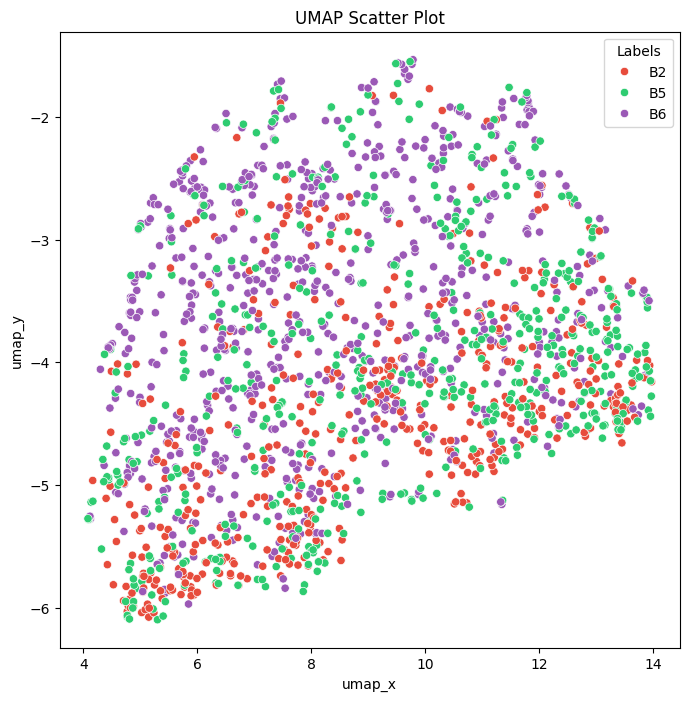

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette('bright')  # Màu sắc tươi sáng
# Chỉnh bảng màu và thứ tự nhãn
# palette = sns.color_palette('Set1', 3)  # Sử dụng chung bảng màu cho cả 4 biểu đồ

# Định nghĩa bảng màu với màu đỏ, xanh lá và tím (tương ứng với tần số ánh sáng tăng dần)
palette = sns.color_palette(["#e74c3c", "#2ecc71", "#9b59b6"])
# Áp dụng bảng màu cho tất cả các biểu đồ
sns.set_palette(palette)
label_order = ['B2', 'B5', 'B6']  # Thứ tự nhãn cần hiển thị

# Vẽ biểu đồ scatter với PCA
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='pca_x', y='pca_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('PCA Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('pca_scatter.png')
plt.show()

# Vẽ biểu đồ scatter với t-SNE
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='tsne_x', y='tsne_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('t-SNE Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('tsne_scatter.png')
plt.show()

# Vẽ biểu đồ scatter với LDA
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='lda_x', y='lda_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('LDA Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('lda_scatter.png')
plt.show()

# Vẽ biểu đồ scatter với UMAP
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='umap_x', y='umap_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('UMAP Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('umap_scatter.png')
plt.show()

In [11]:
dataset_info

,label,count,set
0,B2,353,train
1,B5,368,train
2,B6,541,train
0,B2,68,valid
1,B5,77,valid
2,B6,125,valid
0,B2,61,test
1,B5,96,test
2,B6,115,test


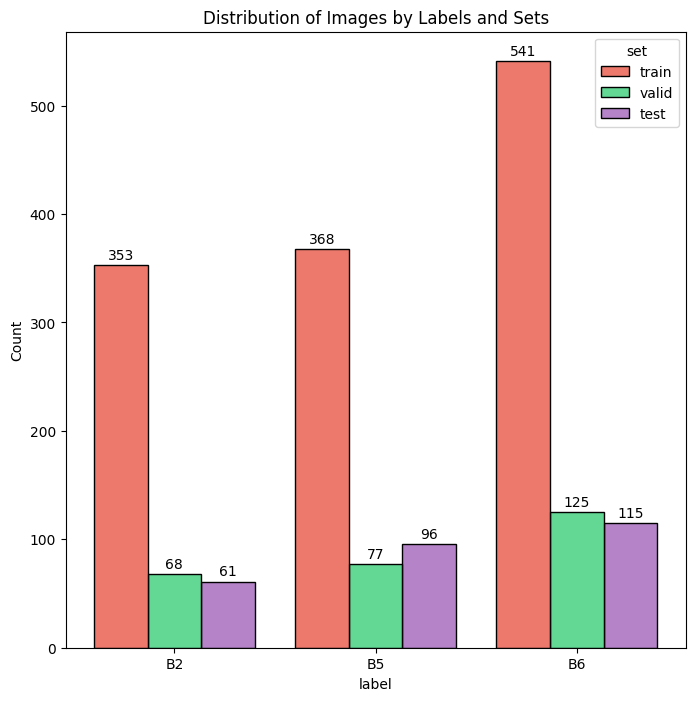

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ histogram về phân phối số lượng ảnh
plt.figure(figsize=(8, 8))
ax = sns.histplot(data=dataset_info, x='label', hue='set', weights='count', multiple="dodge", shrink=0.8)

# Thêm nhãn dữ liệu (số lượng) lên mỗi thanh
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')

# Đặt tiêu đề và hiển thị biểu đồ
plt.title('Distribution of Images by Labels and Sets')
plt.savefig('disribution_of_dataset.png')
plt.show()

---

In [13]:
import pandas as pd
import ast

# Hàm đọc file CSV và xử lý
def load_and_extract_data(csv_file):
    # Đọc file CSV
    df = pd.read_csv(csv_file)

    # Chuyển đổi chuỗi 'predicted_vector' thành list
    df['predicted_vector'] = df['predicted_vector'].apply(lambda x: ast.literal_eval(x))

    # Chỉ lấy 3 chiều đầu tiên từ phần tử đầu tiên của predicted_vector
    df['input_vector'] = df['predicted_vector'].apply(lambda x: x[0][:3])

    # Chỉ giữ lại cột label và input_vector
    df_processed = df[['label', 'input_vector']]
    
    return df_processed

# Load dữ liệu từ 3 file CSV
data_dir = '/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase3_140924/data/data_for_module2'
csv_files = [data_dir + '/train_not_aug.csv', data_dir + '/val_not_aug.csv', data_dir + '/test_not_aug.csv']
all_data = pd.concat([load_and_extract_data(file) for file in csv_files], ignore_index=True)

In [14]:
all_data.head()

,label,input_vector
0,2,"[-3.243804693222046, -4.282371997833252, 6.000..."
1,2,"[-6.004300117492676, -1.9905723333358765, 6.11..."
2,2,"[-4.808416843414307, -0.926472544670105, 5.279..."
3,2,"[-3.5170092582702637, -4.159135818481445, 7.27..."
4,2,"[-10.207520484924316, -0.6803140044212341, 7.4..."


In [15]:
all_data['input_vector'].shape

(1804,)

In [16]:
all_data.shape

(1804, 2)

In [17]:
# Tách 3 chiều của input_vector thành các cột riêng biệt
all_data[['B2', 'B5', 'B6']] = pd.DataFrame(all_data['input_vector'].tolist(), index=all_data.index)

# Bỏ cột 'input_vector' không cần nữa
all_data = all_data.drop(columns=['input_vector'])

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap

# Chuyển đổi label thành dạng số (0, 1, 2) nếu chưa phải là dạng số
all_data['label'] = all_data['label'].astype(int)

# Tạo mảng dữ liệu và nhãn
X = all_data[['B2', 'B5', 'B6']].values
y = all_data['label'].values

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

# LDA (LDA yêu cầu dữ liệu có nhãn)
lda = LDA(n_components=2)
lda_result = lda.fit_transform(X, y)

# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(X)

/home/haipn/python_env/miniconda3/envs/thyroidcancer/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
# Tạo DataFrame chứa kết quả của các phương pháp
result_df = pd.DataFrame({
    'label': all_data['label'],
    'pca_x': pca_result[:, 0], 'pca_y': pca_result[:, 1],
    'tsne_x': tsne_result[:, 0], 'tsne_y': tsne_result[:, 1],
    'lda_x': lda_result[:, 0], 'lda_y': lda_result[:, 1],
    'umap_x': umap_result[:, 0], 'umap_y': umap_result[:, 1],
})

# Lưu kết quả ra file CSV
result_df.to_csv('reduced_dimensions_after_effb0.csv', index=False)

In [20]:
result_df

,label,pca_x,pca_y,tsne_x,tsne_y,lda_x,lda_y,umap_x,umap_y
0,2,-3.051608,-6.225507,2.068674,-20.024849,0.882399,2.305839,1.057859,12.652406
1,2,-5.892591,-4.031579,-26.008286,-21.098038,2.155980,1.557726,-3.099442,11.360906
2,2,-4.709859,-2.942124,-13.693355,-10.869780,2.219525,1.124433,-1.319005,8.833799
3,2,-3.970034,-6.883819,-1.227415,-38.614025,1.673180,2.541337,0.342966,15.385634
4,2,-10.345467,-3.067282,-38.317600,-16.108633,3.636868,1.296583,-4.429782,9.954917
...,...,...,...,...,...,...,...,...,...
1799,1,-4.370490,6.150361,-16.502251,31.792200,1.734082,-2.141212,1.017091,-1.683487
1800,1,-0.074979,10.830707,6.285153,48.863270,0.688049,-3.924672,5.135017,-4.980043
1801,1,-4.980263,3.372419,-18.803921,19.892939,2.181039,-1.138888,0.004164,0.159264
1802,1,-6.323984,9.376121,-15.499503,49.928089,2.947968,-3.287364,1.152972,-4.632168


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Ánh xạ nhãn 0, 1, 2 thành B2, B5, B6
# label_mapping = {0: 'B2', 1: 'B5', 2: 'B6'}
# result_df['label'] = result_df['label'].map(label_mapping)

# # Tính tần suất xuất hiện của mỗi nhãn
# label_counts = result_df['label_mapped'].value_counts()

# # Sắp xếp nhãn theo tần suất (từ thấp đến cao) và đặt màu từ đỏ đến xanh
# sorted_labels = ['B2', 'B5', 'B6'] # label_counts.index.tolist()  # ['B2', 'B5', 'B6']
# color_palette = sns.color_palette("RdYlGn", len(sorted_labels))

# # Tạo bảng ánh xạ màu theo tần suất
# label_color_mapping = {label: color for label, color in zip(sorted_labels, color_palette)}

# # Vẽ biểu đồ scatter cho PCA
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x='pca_x', y='pca_y', hue='label_mapped', data=result_df, 
#                 palette=label_color_mapping, legend='full')
# plt.title('PCA Scatter Plot')
# plt.savefig('pca_scatter_after_effb0.png')
# plt.show()

# # Vẽ biểu đồ scatter cho t-SNE
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x='tsne_x', y='tsne_y', hue='label_mapped', data=result_df, 
#                 palette=label_color_mapping, legend='full')
# plt.title('t-SNE Scatter Plot')
# plt.savefig('tsne_scatter_after_effb0.png')
# plt.show()

# # Vẽ biểu đồ scatter cho LDA
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x='lda_x', y='lda_y', hue='label_mapped', data=result_df, 
#                 palette=label_color_mapping, legend='full')
# plt.title('LDA Scatter Plot')
# plt.savefig('lda_scatter_after_effb0.png')
# plt.show()

# # Vẽ biểu đồ scatter cho UMAP
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x='umap_x', y='umap_y', hue='label_mapped', data=result_df, 
#                 palette=label_color_mapping, legend='full')
# plt.title('UMAP Scatter Plot')
# plt.savefig('umap_scatter_after_effb0.png')
# plt.show()

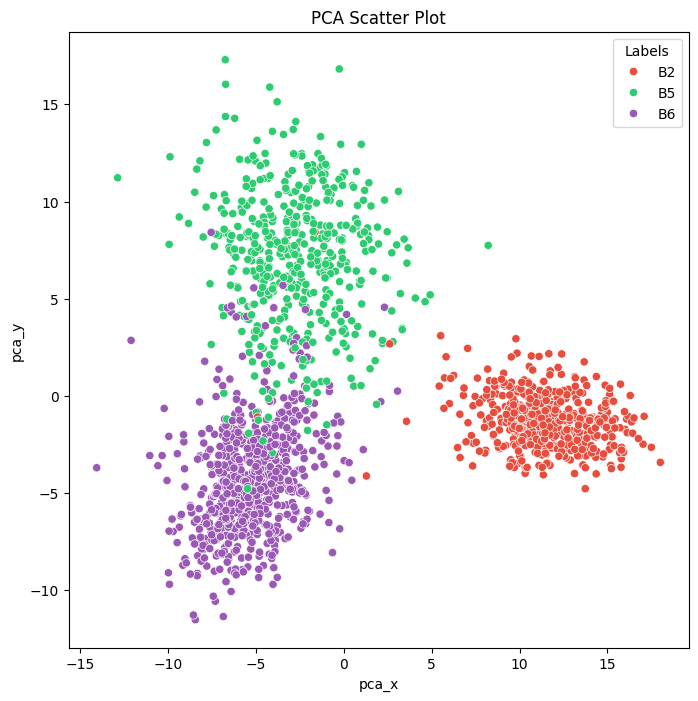

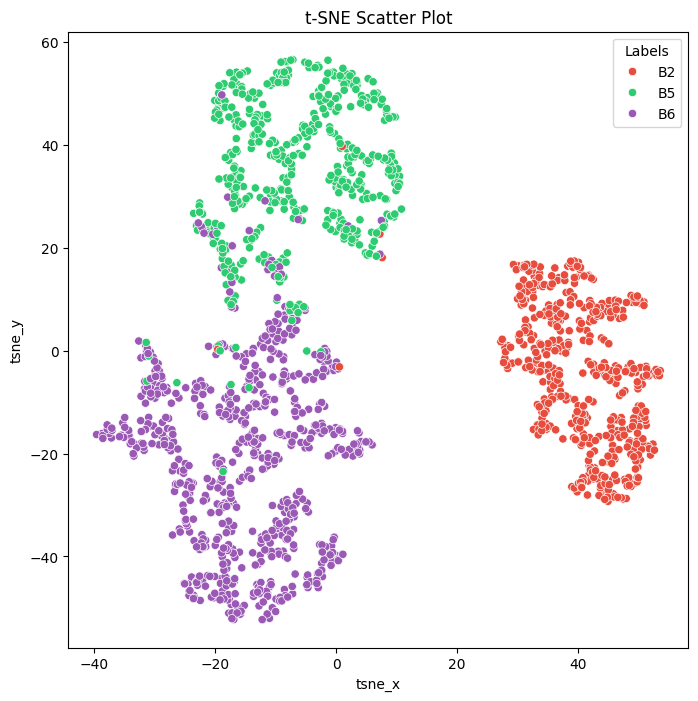

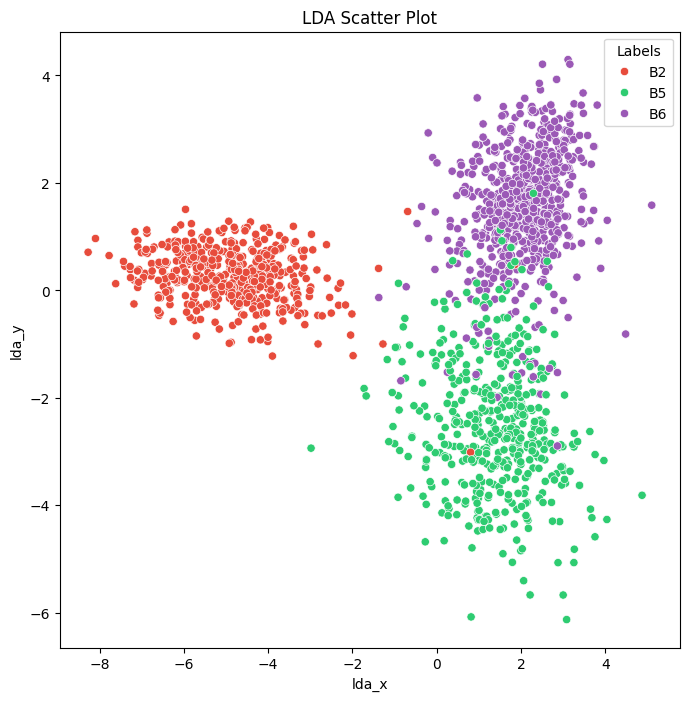

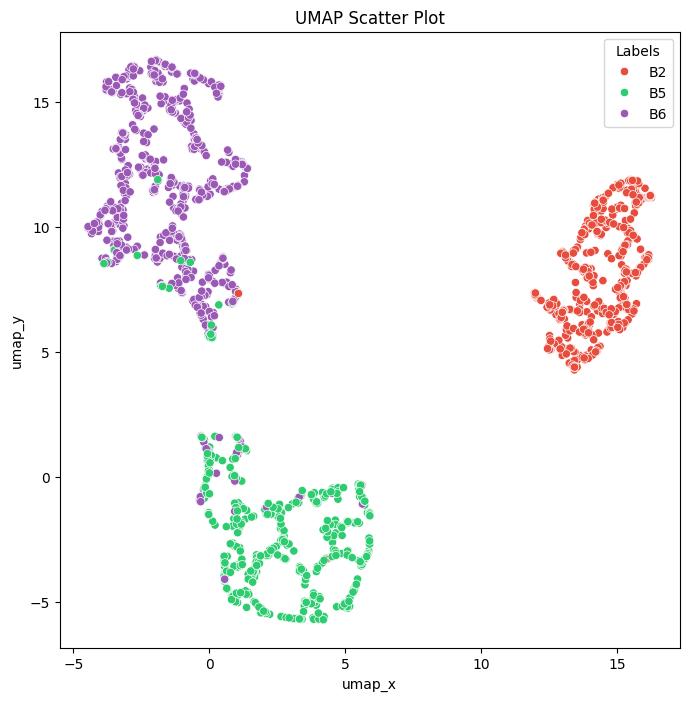

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette('bright')  # Màu sắc tươi sáng

# Định nghĩa bảng màu với màu đỏ, xanh lá và tím (tương ứng với tần số ánh sáng tăng dần)
palette = sns.color_palette(["#e74c3c", "#2ecc71", "#9b59b6"])
# Áp dụng bảng màu cho tất cả các biểu đồ
sns.set_palette(palette)
label_order = ['B2', 'B5', 'B6']  # Thứ tự nhãn cần hiển thị

# Ánh xạ nhãn 0, 1, 2 thành B2, B5, B6
label_mapping = {0: 'B2', 1: 'B5', 2: 'B6'}
result_df['label'] = result_df['label'].map(label_mapping)

# Vẽ biểu đồ scatter với PCA
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='pca_x', y='pca_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('PCA Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('pca_scatter_after_effb0.png')
plt.show()

# Vẽ biểu đồ scatter với t-SNE
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='tsne_x', y='tsne_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('t-SNE Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('tsne_scatter_after_effb0.png')
plt.show()

# Vẽ biểu đồ scatter với LDA
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='lda_x', y='lda_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('LDA Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('lda_scatter_after_effb0.png')
plt.show()

# Vẽ biểu đồ scatter với UMAP
plt.figure(figsize=(8, 8))  # Chiều dài và rộng bằng nhau
sns.scatterplot(x='umap_x', y='umap_y', hue='label', data=result_df, palette=palette, hue_order=label_order)
plt.title('UMAP Scatter Plot')
plt.legend(title='Labels', loc='best')
plt.savefig('umap_scatter_after_effb0.png')
plt.show()